In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#!pip install xlrd

In [ ]:
df = pd.read_csv('F:/Saja/3rd year/summer trainning/mobile_price.csv')
hidf = pd.read_csv('F:/Saja/3rd year/summer trainning/mobile_price_test_hidden.csv')

In [ ]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1868 entries, 0 to 1867
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1868 non-null   int64  
 1   blue           1868 non-null   int64  
 2   clock_speed    1868 non-null   float64
 3   dual_sim       1868 non-null   int64  
 4   fc             1868 non-null   int64  
 5   four_g         1868 non-null   int64  
 6   int_memory     1868 non-null   int64  
 7   m_dep          1868 non-null   float64
 8   mobile_wt      1868 non-null   int64  
 9   n_cores        1868 non-null   int64  
 10  pc             1868 non-null   int64  
 11  px_height      1868 non-null   int64  
 12  px_width       1868 non-null   int64  
 13  ram            1868 non-null   int64  
 14  sc_h           1868 non-null   int64  
 15  sc_w           1868 non-null   int64  
 16  talk_time      1868 non-null   int64  
 17  three_g        1868 non-null   int64  
 18  touch_sc

In [ ]:
#completeness
df.isnull().any()
#there is no missing values
#using 'any()' to get true & false values

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool

In [ ]:
#dealing with invalid vals
df.isna().sum()
#there isn't

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [ ]:
#uniquness
df = df.drop_duplicates(keep='first')

In [ ]:
#consistency
df.isnull().value_counts()

battery_power  blue   clock_speed  dual_sim  fc     four_g  int_memory  m_dep  mobile_wt  n_cores  pc     px_height  px_width  ram    sc_h   sc_w   talk_time  three_g  touch_screen  wifi   price_range
False          False  False        False     False  False   False       False  False      False    False  False      False     False  False  False  False      False    False         False  False          1868
dtype: int64

In [ ]:
df.var()

battery_power    1.940328e+05
blue             2.501199e-01
clock_speed      6.651856e-01
dual_sim         2.500075e-01
fc               1.896449e+01
four_g           2.496978e-01
int_memory       3.298053e+02
m_dep            8.362956e-02
mobile_wt        1.250432e+03
n_cores          5.208765e+00
pc               3.672535e+01
px_height        1.943569e+05
px_width         1.863430e+05
ram              1.179635e+06
sc_h             1.770302e+01
sc_w             1.911704e+01
talk_time        2.969257e+01
three_g          1.815698e-01
touch_screen     2.501199e-01
wifi             2.500992e-01
price_range      1.256970e+00
dtype: float64

In [ ]:
hidf_copy = hidf.copy()
# apply normalization
hidf_copy['battery_power'] = np.log(hidf_copy['battery_power'])
hidf_copy['ram'] = np.log(hidf_copy['ram'])
hidf_copy['ram'].var()

0.45422517463053314

In [ ]:
df_copy = df.copy()
# apply normalization
df_copy['battery_power'] = np.log(df_copy['battery_power'])
df_copy['ram'] = np.log(df_copy['ram'])
df_copy['ram'].var()

0.45332092520108164

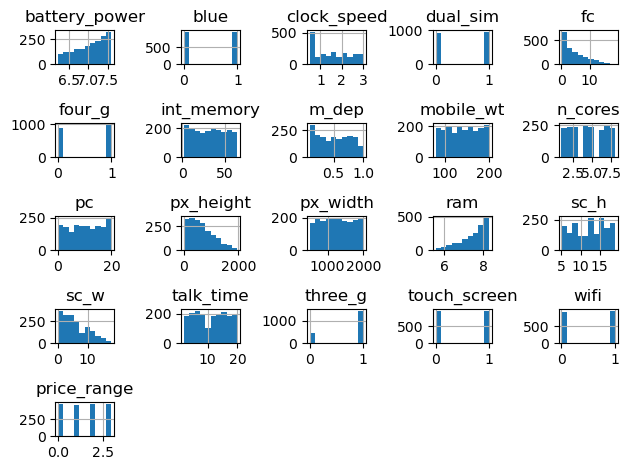

In [ ]:
#visualizations
df_copy.hist()
plt.tight_layout()
plt.show()

In [ ]:
df_copy.corr().style.background_gradient(cmap='coolwarm')
#heatmap

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.001413,0.020456,-0.049511,0.026223,0.025281,-0.001735,0.031884,0.001677,-0.031924,0.026128,0.020664,-0.006313,-0.013463,-0.031406,-0.010471,0.057495,0.019003,-0.009385,-0.006873,0.186452
blue,0.001413,1.000000,0.030903,0.036581,0.006459,0.006743,0.040214,0.006332,-0.015412,0.028193,-0.006214,-0.003640,-0.046270,0.028379,0.002207,0.007674,0.026837,-0.038122,0.012905,-0.021327,0.019180
clock_speed,0.020456,0.030903,1.000000,0.008274,0.002758,-0.043033,0.008364,-0.017871,0.016073,-0.007251,-0.005963,-0.016413,-0.015027,0.005252,-0.022934,-0.000871,-0.011193,-0.043646,0.026350,-0.023387,-0.008084
dual_sim,-0.049511,0.036581,0.008274,1.000000,-0.039798,0.003348,-0.008771,-0.024186,-0.009099,-0.037660,-0.020418,-0.024888,0.009264,0.042978,-0.016806,-0.020332,-0.051826,-0.008792,-0.006594,0.016871,0.020795
fc,0.026223,0.006459,0.002758,-0.039798,1.000000,-0.007288,-0.025435,-0.001123,0.029354,-0.017503,0.648368,-0.008403,-0.000051,0.020468,-0.006964,-0.008405,-0.016715,0.012668,-0.012853,0.033557,0.023938
four_g,0.025281,0.006743,-0.043033,0.003348,-0.007288,1.000000,0.016391,0.000540,-0.012752,-0.025098,-0.003326,-0.012581,0.004412,0.007277,0.033987,0.040282,-0.048480,0.583072,0.018976,-0.019782,0.026351
int_memory,-0.001735,0.040214,0.008364,-0.008771,-0.025435,0.016391,1.000000,0.010962,-0.035493,-0.021435,-0.031287,0.018258,0.000432,0.020264,0.039243,0.012372,0.015422,-0.001810,-0.022758,0.009454,0.045992
m_dep,0.031884,0.006332,-0.017871,-0.024186,-0.001123,0.000540,0.010962,1.000000,0.022064,-0.009600,0.034092,0.012780,0.016782,0.006958,-0.037200,-0.027949,0.011818,-0.008174,-0.007813,-0.031907,0.007716
mobile_wt,0.001677,-0.015412,0.016073,-0.009099,0.029354,-0.012752,-0.035493,0.022064,1.000000,-0.022999,0.034604,-0.007695,-0.000208,-0.009438,-0.038955,-0.023617,0.008715,0.001044,-0.026959,0.001599,-0.036415
n_cores,-0.031924,0.028193,-0.007251,-0.037660,-0.017503,-0.025098,-0.021435,-0.009600,-0.022999,1.000000,0.000406,-0.011111,0.021133,0.012599,0.011769,0.029898,0.011042,-0.014043,0.030465,-0.004282,0.004765


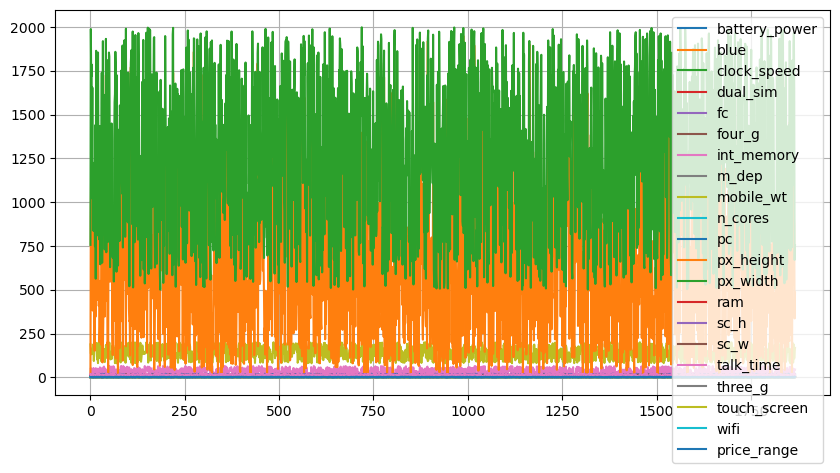

In [ ]:
df_copy.plot(figsize=(10,5))
plt.grid(True)
plt.show()

In [ ]:
df_copy["price_range"].value_counts()

3    474
2    473
0    466
1    455
Name: price_range, dtype: int64

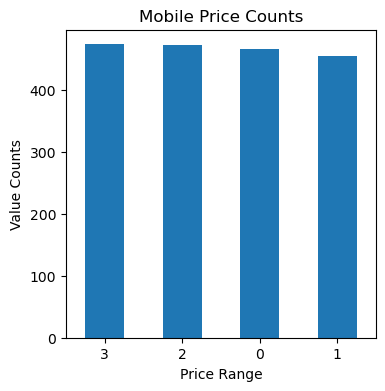

In [ ]:
df_copy['price_range'].value_counts().plot(kind='bar', figsize=(4,4), rot=0)
plt.xlabel('Price Range') #0 for low cost,1 for medium , 2 fro high , 3 for very high
plt.ylabel("Value Counts")#max = 474
plt.title('Mobile Price Counts')
plt.show()

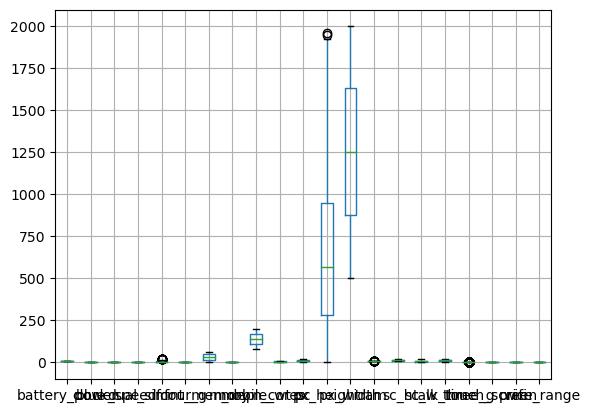

In [ ]:
df_copy.boxplot()
plt.show()

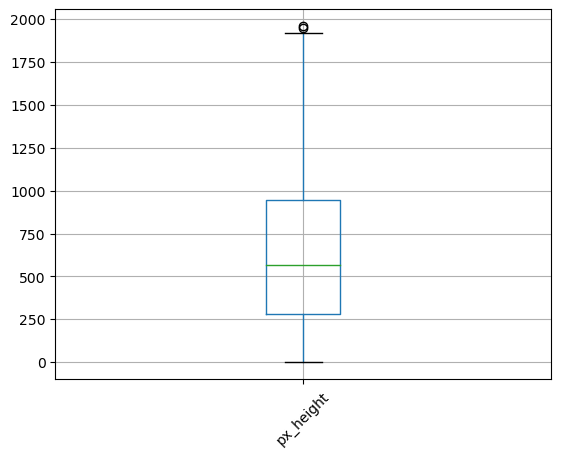

In [ ]:
df_copy.boxplot('px_height')
plt.xticks(rotation=45)
plt.show()

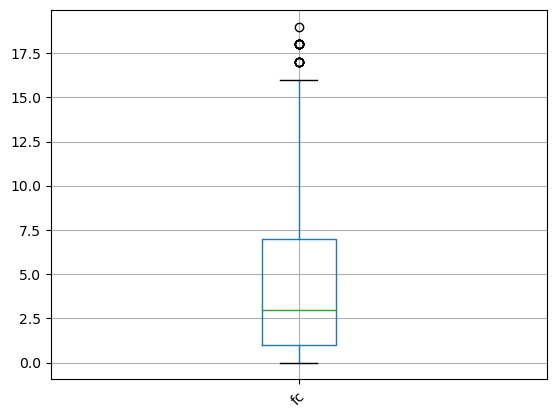

In [ ]:
df_copy.boxplot('fc')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#removing outliers
px_height_q25, px_height_q75=df_copy.px_height.quantile(0.25), df_copy.px_height.quantile(0.75)
px_height_IQR = px_height_q75 - px_height_q25
fc_q25, fc_q75 = df_copy.fc.quantile(0.25), df_copy.fc.quantile(0.75)
fc_IQR = fc_q75 - fc_q25

px_height_lower, px_height_upper = px_height_q25 - (1.5 * px_height_IQR), px_height_q75 + (1.5 * px_height_IQR)
fc_lower, fc_upper = fc_q25 - (1.5 * fc_IQR), fc_q75 + (1.5 * fc_IQR)
df_copy.drop(df_copy[(df_copy['fc'] >= fc_upper) | (df_copy['fc'] <= fc_lower)].index, axis = 0, inplace=True)
df_copy.drop(df_copy[(df_copy['px_height'] >= px_height_upper) | (df_copy['px_height'] <= px_height_lower)].index, axis = 0, inplace=True)

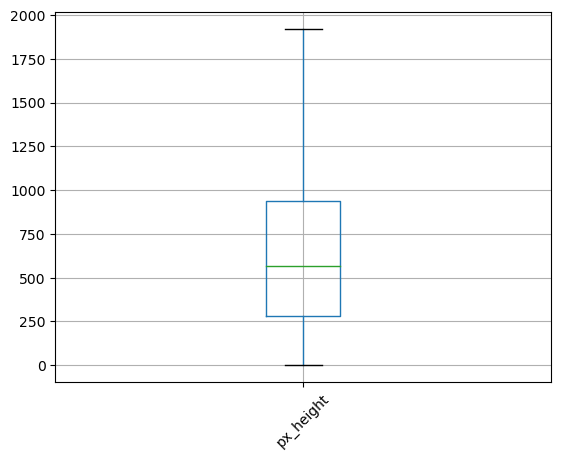

In [ ]:
df_copy.boxplot('px_height')
plt.xticks(rotation=45)
plt.show()

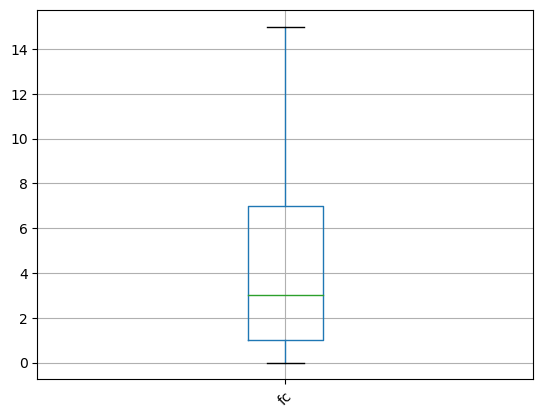

In [ ]:
df_copy.boxplot('fc')
plt.xticks(rotation=45)
plt.show()

In [ ]:
X = df_copy.drop(['price_range'], axis=1)
y = df_copy['price_range']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
pd.get_dummies(y, columns=['price_range']).head()

,0,1,2,3
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,1,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

df_copy_1 = X.copy()
df_copy_1_scaled = ss.fit_transform(df_copy_1)

df_copy_1_scaled_df = pd.DataFrame(df_copy_1_scaled, columns=df_copy_1.columns)
df_copy_1_scaled_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.807673,-0.992370,0.837733,-1.023246,-0.765026,-1.036781,-1.389322,0.336613,1.342860,-1.101177,-1.291607,-1.421255,-1.150198,0.532177,-0.789531,0.279413,1.481068,-1.776104,-1.007688,0.998907
1,-0.313758,1.007688,-1.247106,0.977282,-1.014351,0.964524,1.142159,0.682497,-0.128014,-0.662721,-0.623273,0.604000,1.708874,0.579210,1.117340,-0.636351,-0.722154,0.563030,0.992370,-1.001095
2,-1.839023,1.007688,-1.247106,0.977282,-0.515700,0.964524,0.481773,1.374266,0.126560,0.214191,-0.623273,1.423255,1.077650,0.563317,-0.312813,-0.865292,-0.354950,0.563030,0.992370,-1.001095
3,-1.612657,1.007688,1.205645,-1.023246,-1.014351,-1.036781,-1.224225,1.028381,-0.269445,0.652647,-0.122022,1.315699,1.240097,0.655149,0.878981,0.508354,0.012254,0.563030,-1.007688,-1.001095
4,1.168831,1.007688,-0.388643,-1.023246,2.226881,0.964524,0.646869,0.336613,0.013416,-1.101177,0.713395,1.297392,-0.091970,-0.346318,-1.027890,-0.865292,0.746661,0.563030,0.992370,-1.001095


In [ ]:
hidf_copy_1 = hidf_copy.copy()
hidf_copy_1_scaled = ss.fit_transform(hidf_copy_1)
hidf_copy_1_scaled_df = pd.DataFrame(hidf_copy_1_scaled, columns=hidf_copy_1.columns)
hidf_copy_1_scaled_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,-0.485867,-0.955533,-1.300908,-0.970143,0.455355,0.941124,1.411791,-1.467525,-0.348462,1.418095,-0.502511,-1.170557,1.032443,-0.318514,-1.457473,-0.205743,-1.455500,0.565685,-0.984962,0.955533
1,-0.491465,-0.955533,-0.082172,1.030776,0.455355,-1.062559,-0.667578,-0.746060,-0.488441,-0.275919,-0.502511,-0.644860,1.139535,0.884089,1.104574,1.734123,-0.556034,0.565685,1.015268,0.955533
2,0.403799,1.046536,-1.300908,-0.970143,0.213962,0.941124,-0.161785,-0.746060,0.211453,-0.699422,1.294646,-0.102606,-0.163797,0.749951,-1.224559,-0.933193,-1.275607,0.565685,-0.984962,0.955533
3,0.631731,-0.955533,-1.300908,-0.970143,-0.268824,-1.062559,0.568803,0.696870,1.331282,-1.122926,-0.829266,0.644547,-0.377981,-1.836377,-0.991646,-0.448227,1.422792,-1.767767,-0.984962,0.955533
4,1.455252,1.046536,-1.300908,1.030776,-0.268824,-1.062559,-0.498980,1.057602,-1.160338,1.418095,-0.502511,-1.085701,-1.642578,0.096205,-0.059993,1.006673,-0.735927,-1.767767,-0.984962,0.955533


In [ ]:
#from imblearn.over_sampling import SMOTE
#X_new, y_new = SMOTE().fit_resample(df_copy_1_scaled_df,y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_copy_1_scaled_df,y , test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=1000, criterion='entropy',max_features='log2')
clf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_features='log2',
                       n_estimators=1000)

In [ ]:
clf.score(x_test,y_test)

0.9016393442622951

In [ ]:
clf.score(x_train, y_train)

1.0

In [ ]:
from sklearn.metrics import confusion_matrix,auc, roc_curve,classification_report
y_pred = clf.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.95      0.92        85
           1       0.91      0.82      0.86        95
           2       0.88      0.90      0.89        94
           3       0.95      0.93      0.94        92

    accuracy                           0.90       366
   macro avg       0.90      0.90      0.90       366
weighted avg       0.90      0.90      0.90       366



In [ ]:
cf_mat = confusion_matrix(y_test, y_pred)
print('Confusion matrix')
print(cf_mat)


Confusion matrix
[[81  4  0  0]
 [11 78  6  0]
 [ 0  4 85  5]
 [ 0  0  6 86]]


In [ ]:
clf=RandomForestClassifier()
param={'max_features':['sqrt','log2']}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
lfcv= GridSearchCV(clf,param_grid=param,cv=5,return_train_score=True)

In [ ]:
lfcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2']},
             return_train_score=True)

In [ ]:
lfcv.cv_results_

{'mean_fit_time': array([0.4701695, 0.4425601]),
 'std_fit_time': array([0.02652836, 0.00664059]),
 'mean_score_time': array([0.02284155, 0.01858659]),
 'std_score_time': array([0.00422472, 0.00079969]),
 'param_max_features': masked_array(data=['sqrt', 'log2'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_features': 'sqrt'}, {'max_features': 'log2'}],
 'split0_test_score': array([0.87372014, 0.84641638]),
 'split1_test_score': array([0.82593857, 0.82593857]),
 'split2_test_score': array([0.85958904, 0.88013699]),
 'split3_test_score': array([0.85273973, 0.86643836]),
 'split4_test_score': array([0.86986301, 0.87328767]),
 'mean_test_score': array([0.8563701 , 0.85844359]),
 'std_test_score': array([0.0169275 , 0.01977927]),
 'rank_test_score': array([2, 1]),
 'split0_train_score': array([1., 1.]),
 'split1_train_score': array([1., 1.]),
 'split2_train_score': array([1., 1.]),
 'split3_train_score': array([1., 1.]),
 'split4_t

In [ ]:
lfBest = lfcv.best_estimator_
lfBest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
print(lfBest.score(x_train,y_train), lfBest.score(x_test,y_test))

1.0 0.8715846994535519


In [ ]:
lfBest.predict(hidf_copy_1_scaled_df)

array([0, 3, 2, 0, 1, 1, 3, 0, 0, 2, 2, 0, 3, 2, 2, 0, 1, 3, 0, 0, 2, 2,
       3, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 0, 1, 0, 0, 0, 0, 3, 3, 1, 0, 2,
       2, 0, 0, 1, 2, 0, 2, 0, 2, 1, 2, 1, 1, 1, 3, 3, 0, 3, 2, 0, 1, 2,
       3, 3, 1, 1, 1, 1, 0, 3, 1, 2, 0, 3, 3, 1, 3, 2, 2, 2, 0, 1, 2, 3,
       0, 2, 3, 0, 0, 0, 0, 0, 3, 1, 2, 2, 1, 2, 1, 3, 0, 2, 2, 2, 3, 2,
       1, 3, 0, 1, 1, 2, 3, 3, 3, 3, 1, 1, 0, 1, 3, 2, 2, 1, 1, 0, 3, 3],
      dtype=int64)

In [ ]:
def rocAuc(model, Xtest, ytest, model_name):
    cols = model.classes_
    y_test_binarized = pd.get_dummies(ytest, prefix=['Class'])
    score = model.predict_proba(Xtest)

    fpr = {}
    tpr = {}
    roc_auc = {}
    for i in range(len(model.classes_)):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized.iloc[:,i],score[:,i])
        roc_auc[i] = auc(fpr[i],tpr[i])

    plt.figure(figsize=(4,4))
    for i in range(len(model.classes_)):
        plt.plot(fpr[i],tpr[i], label=f'{cols[i]}-vs-Rest curve (area = %0.2f)' % roc_auc[i])

    plt.plot([0,1],[0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel('True Positive Rate')
    plt.title(f"{model_name} Receiver Operation Characteristic")
    plt.legend(loc='lower right')
    plt.show()

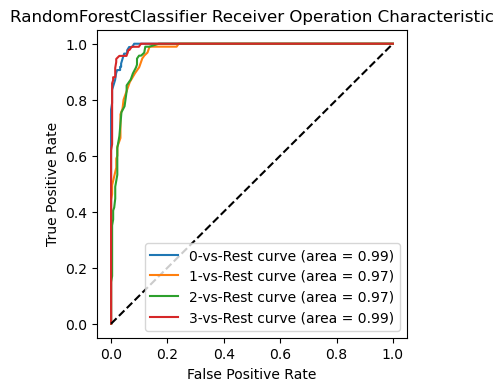

In [ ]:
rocAuc(lfBest,x_test,y_test,'RandomForestClassifier')

In [ ]:
prediction=pd.DataFrame(lfBest.predict(hidf_copy_1_scaled_df))

In [ ]:
prediction.to_csv('prediction_saja.csv',index=False)